<a href="https://colab.research.google.com/github/jafetl/An-lise-sobre-acidentes-de-transito/blob/main/Graficos___Analise_de_acidentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import collections

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/jafetl/An-lise-sobre-acidentes-de-transito/main/datatran2021.csv" , encoding = "ISO-8859-1", sep = ';')

In [4]:
df = df.dropna()

In [7]:
df

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,331693,2021-01-01,sexta-feira,00:02:00,SC,101.0,"314,9",LAGUNA,Ingestão de álcool pelo condutor,Colisão traseira,...,0,2,0,1,2,"-28,43029392","-48,84925073",SR-SC,UOP01,DEL02
1,331694,2021-01-01,sexta-feira,00:15:00,PR,376.0,188,MARIALVA,Velocidade Incompatível,Colisão com objeto,...,0,0,0,2,1,"-23,46634923","-51,82808011",SR-PR,UOP01,DEL09
2,331696,2021-01-01,sexta-feira,00:00:00,SP,116.0,"110,6",TAUBATE,Demais falhas mecânicas ou elétricas,Incêndio,...,0,1,0,0,1,"-23,03412614","-45,5526999",SR-SP,UOP01,DEL06
3,331699,2021-01-01,sexta-feira,01:20:00,SC,101.0,111,NAVEGANTES,Manobra de mudança de faixa,Colisão lateral,...,0,1,0,2,2,"-26,83955734","-48,71418074",SR-SC,UOP04,DEL04
4,331701,2021-01-01,sexta-feira,00:30:00,PE,101.0,"45,1",IGARASSU,Reação tardia ou ineficiente do condutor,Colisão traseira,...,1,1,0,1,2,"-7,86521297","-34,90715176",SR-PE,UOP02,DEL01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30896,373974,2021-06-16,quarta-feira,13:15:00,BA,116.0,466,SANTO ESTEVAO,Condutor deixou de manter distância do veículo...,Colisão traseira,...,0,0,1,1,2,"-12,45221025","-39,25402888",SR-BA,UOP01,DEL02
30897,374024,2021-06-28,segunda-feira,10:50:00,PR,277.0,576,CASCAVEL,Velocidade Incompatível,Engavetamento,...,0,6,0,2,5,"-24,98692731","-53,33030208",SR-PR,UOP01,DEL04
30898,374224,2021-06-13,domingo,02:50:00,SP,116.0,"102,7",PINDAMONHANGABA,Reação tardia ou ineficiente do condutor,Colisão traseira,...,0,0,1,1,2,"-22,99497994","-45,48951403",SR-SP,UOP01,DEL08
30899,374239,2021-06-02,quarta-feira,08:45:00,RN,101.0,85,NATAL,Velocidade Incompatível,Colisão traseira,...,1,1,0,1,2,"-5,777664","-35,24937",SR-RN,UOP01,DEL02


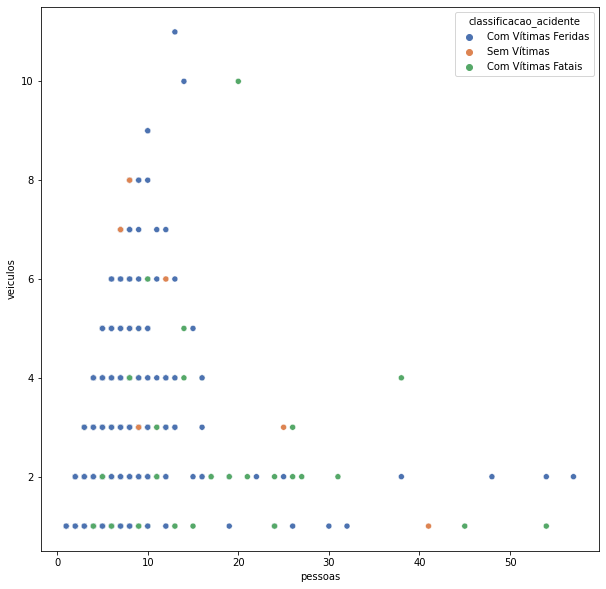

In [6]:
pessoas_veiculos = sns.scatterplot(data=df, x="pessoas", y="veiculos" ,hue="classificacao_acidente", palette="deep")
pessoas_veiculos.figure.set_size_inches(10,10)

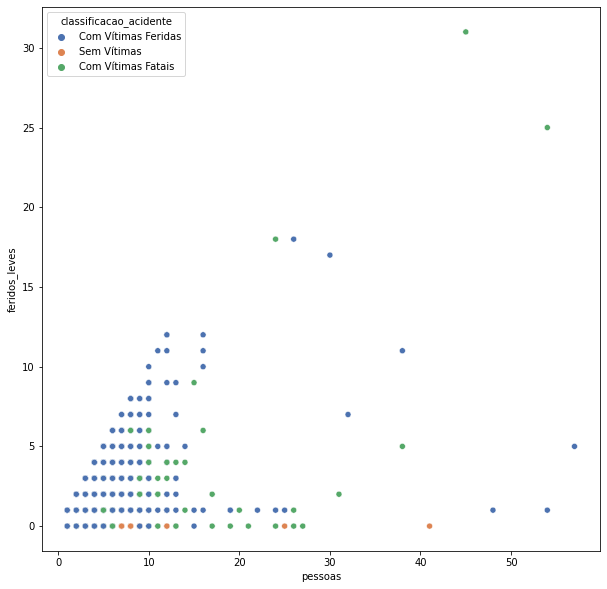

In [9]:
z = sns.scatterplot(data=df, x="pessoas", y="feridos_leves" ,hue="classificacao_acidente", palette="deep")
z.figure.set_size_inches(10,10)

<AxesSubplot:>

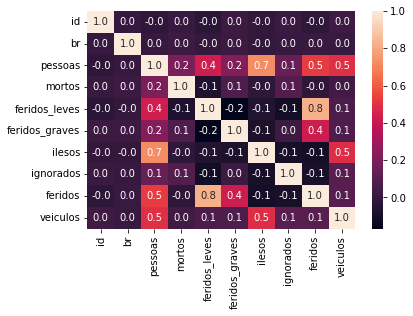

In [ ]:
sns.heatmap(df.corr(), annot = True, fmt=".1f")

<AxesSubplot:xlabel='uf', ylabel='count'>

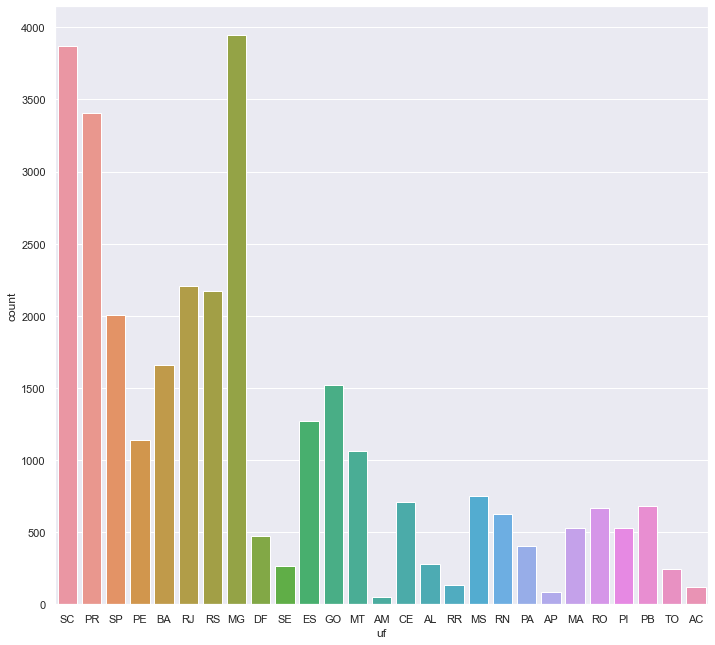

In [ ]:
sns.set(rc={'figure.figsize':(11.7,11)})
sns.countplot(data=df, x= 'uf')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30817 entries, 0 to 30900
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      30817 non-null  int64  
 1   data_inversa            30817 non-null  object 
 2   dia_semana              30817 non-null  object 
 3   horario                 30817 non-null  object 
 4   uf                      30817 non-null  object 
 5   br                      30817 non-null  float64
 6   km                      30817 non-null  object 
 7   municipio               30817 non-null  object 
 8   causa_acidente          30817 non-null  object 
 9   tipo_acidente           30817 non-null  object 
 10  classificacao_acidente  30817 non-null  object 
 11  fase_dia                30817 non-null  object 
 12  sentido_via             30817 non-null  object 
 13  condicao_metereologica  30817 non-null  object 
 14  tipo_pista              30817 non-null

In [ ]:
o = collections.UserDict(df['mortos'])
g = []

for key, value in o.items():
    if value != 0 : 
        g.append(key)


In [ ]:
mortos_df = pd.DataFrame(df.loc[g])

In [ ]:
alcool = df[df['causa_acidente'] == 'Ingestão de álcool pelo condutor']

<AxesSubplot:xlabel='feridos', ylabel='count'>

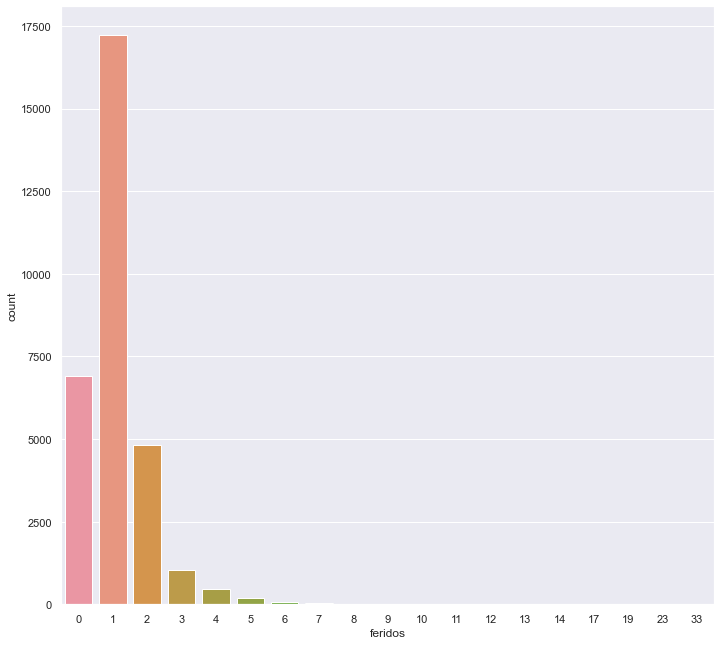

In [ ]:
sns.countplot(data=df, x= 'feridos')

<AxesSubplot:xlabel='count', ylabel='condicao_metereologica'>

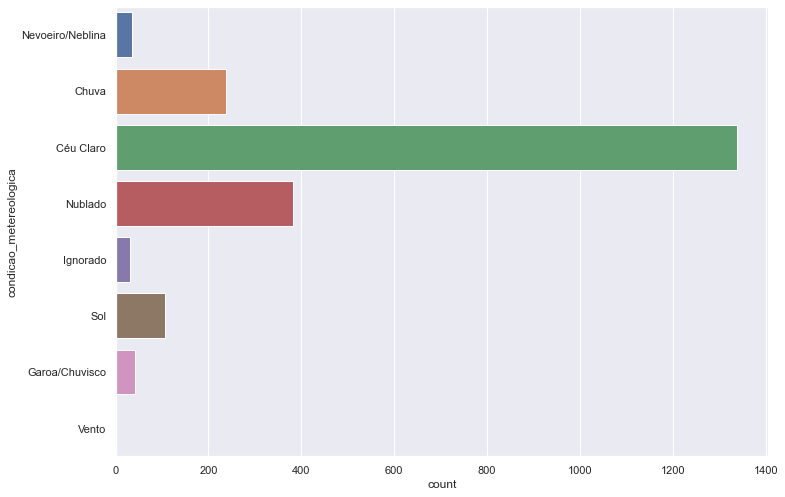

In [ ]:
#Grafico de mortos por condição metereologica  
sns.countplot(data=mortos_df, y= 'condicao_metereologica')

# Acidentes com mortes



<AxesSubplot:xlabel='count', ylabel='tipo_acidente'>

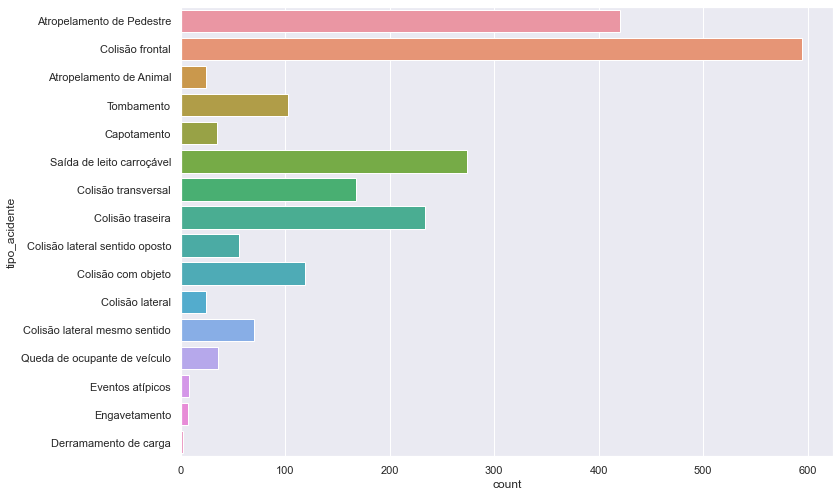

In [ ]:
sns.countplot(data=mortos_df, y= 'tipo_acidente')

# Acidentes no geral


<AxesSubplot:xlabel='count', ylabel='tipo_acidente'>

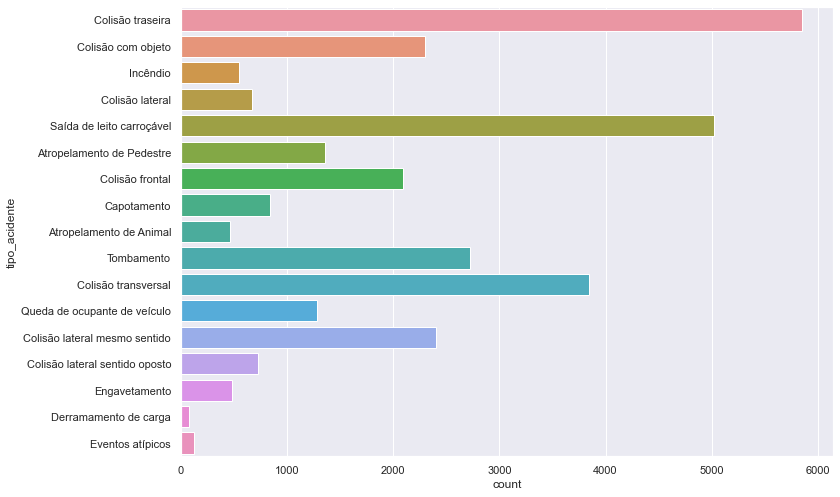

In [ ]:
sns.countplot(data=df, y= 'tipo_acidente')

<AxesSubplot:xlabel='mortos', ylabel='pessoas'>

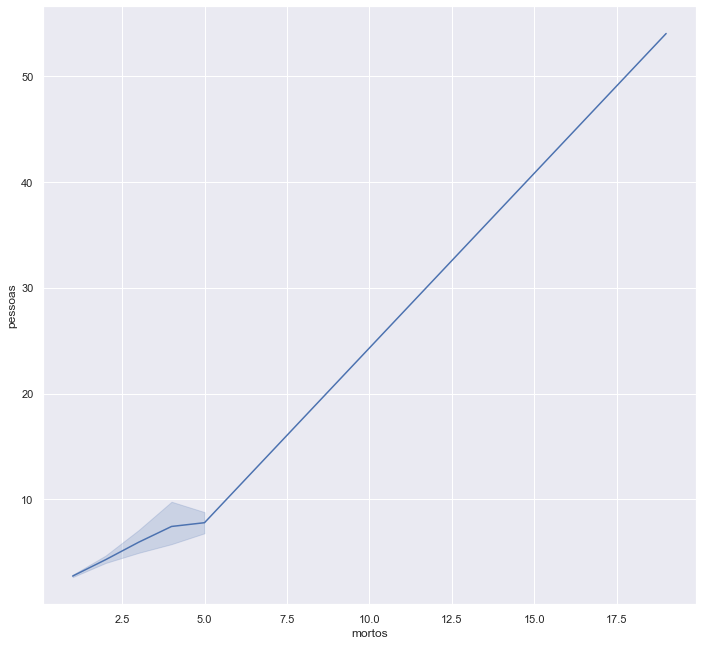

In [ ]:
sns.lineplot(data=mortos_df, x= 'mortos', y = 'pessoas')

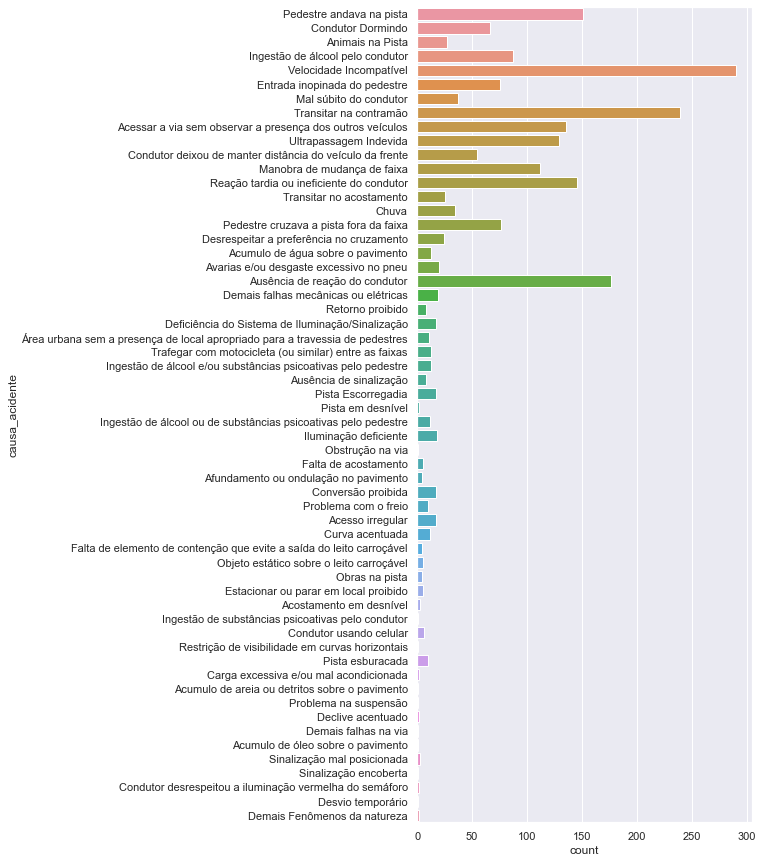

In [ ]:
o =sns.countplot(data=mortos_df, y= 'causa_acidente')
o.figure.set_size_inches(6,15)